In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
from tensorflow import keras
from keras.datasets import imdb
import numpy as np

In [0]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

In [16]:
X_train.shape, len(X_train[2])

((25000,), 141)

In [17]:
y_train[0]

1

In [18]:
max(max(sequence) for sequence in X_train)

9999

In [19]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, "?") for i in X_train[0]]
)

1646592/1641221 [==============================] - 0s 0us/step


In [20]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [0]:
def vectorize_sequences(sequences, dimension=10000):
  result = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    result[i, sequence] = 1
  return result

In [0]:
X_train = vectorize_sequences(X_train)
X_test = vectorize_sequences(X_test)

In [25]:
len(X_train[0]), X_train[0]

(10000, array([0., 1., 1., ..., 0., 0., 0.]))

In [0]:
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

In [0]:
model = keras.Sequential([
                          keras.layers.Dense(16, activation="relu", input_shape=(10000,)),
                          keras.layers.Dense(16, activation="relu"),
                          keras.layers.Dense(1, activation="sigmoid")
])
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [0]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [34]:
history = model.fit(partial_X_train, partial_y_train, batch_size=512, epochs=20, 
                    validation_data=(X_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 164us/sample - loss: 0.5107 - accuracy: 0.7826 - val_loss: 0.3856 - val_accuracy: 0.8628
Epoch 2/20
15000/15000 [==============================] - 2s 111us/sample - loss: 0.3012 - accuracy: 0.9009 - val_loss: 0.2996 - val_accuracy: 0.8869
Epoch 3/20
15000/15000 [==============================] - 2s 109us/sample - loss: 0.2191 - accuracy: 0.9254 - val_loss: 0.2771 - val_accuracy: 0.8894
Epoch 4/20
15000/15000 [==============================] - 2s 109us/sample - loss: 0.1691 - accuracy: 0.9435 - val_loss: 0.2762 - val_accuracy: 0.8888
Epoch 5/20
15000/15000 [==============================] - 2s 109us/sample - loss: 0.1401 - accuracy: 0.9538 - val_loss: 0.3272 - val_accuracy: 0.8723
Epoch 6/20
15000/15000 [==============================] - 2s 108us/sample - loss: 0.1145 - accuracy: 0.9635 - val_loss: 0.3157 - val_accuracy: 0.8789
Epoch 7/20
15000/15000 [==========================

In [0]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [36]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

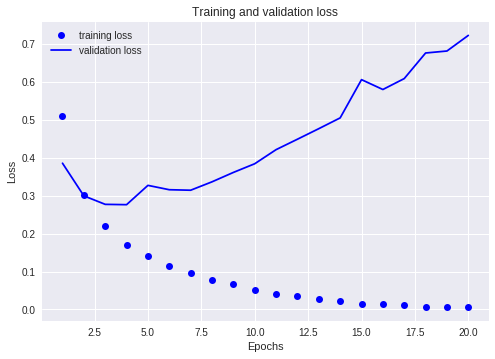

In [41]:
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="training loss")
plt.plot(epochs, val_loss_values, "b", label="validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

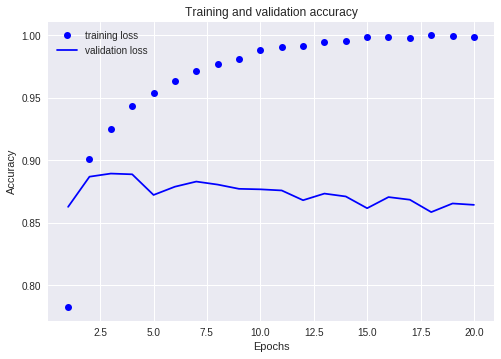

In [42]:
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(epochs, acc, "bo", label="training loss")
plt.plot(epochs, val_acc, "b", label="validation loss")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [0]:
model = keras.Sequential([
                          keras.layers.Dense(16, activation="relu", input_shape=(10000,)),
                          keras.layers.Dense(16, activation="relu"),
                          keras.layers.Dense(1, activation="sigmoid")
])
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [44]:
model.fit(partial_X_train, partial_y_train, epochs=4, batch_size=512,
          validation_data=(X_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 2s 160us/sample - loss: 0.5173 - accuracy: 0.7936 - val_loss: 0.3872 - val_accuracy: 0.8678
Epoch 2/4
15000/15000 [==============================] - 2s 105us/sample - loss: 0.3088 - accuracy: 0.9008 - val_loss: 0.3166 - val_accuracy: 0.8774
Epoch 3/4
15000/15000 [==============================] - 2s 107us/sample - loss: 0.2224 - accuracy: 0.9300 - val_loss: 0.2885 - val_accuracy: 0.8855
Epoch 4/4
15000/15000 [==============================] - 2s 105us/sample - loss: 0.1794 - accuracy: 0.9431 - val_loss: 0.2749 - val_accuracy: 0.8875


In [45]:
model.evaluate(X_test, y_test)

25000/25000 [==============================] - 2s 90us/sample - loss: 0.2931 - accuracy: 0.8828


[0.29306093593120575, 0.8828]

In [46]:
model.predict(X_test)

array([[0.27263522],
       [0.99617034],
       [0.86786556],
       ...,
       [0.08421664],
       [0.1195448 ],
       [0.41999787]], dtype=float32)

In [50]:
model = keras.Sequential([
                          keras.layers.Dense(32, activation="relu", input_shape=(10000,)),
                          keras.layers.Dropout(rate=0.4),
                          keras.layers.Dense(32, activation="relu"),
                          keras.layers.Dropout(rate=0.4),
                          keras.layers.Dense(32, activation="relu"),
                          keras.layers.Dropout(rate=0.4),
                          keras.layers.Dense(1, activation="sigmoid")
])
model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="rmsprop")
model.fit(partial_X_train, partial_y_train, epochs=100, batch_size=32,
          validation_data=(X_val, y_val),
          callbacks=[keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)])

Train on 15000 samples, validate on 10000 samples
Epoch 1/100
15000/15000 [==============================] - 5s 334us/sample - loss: 0.4759 - accuracy: 0.7793 - val_loss: 0.3019 - val_accuracy: 0.8822
Epoch 2/100
15000/15000 [==============================] - 4s 287us/sample - loss: 0.3131 - accuracy: 0.8891 - val_loss: 0.3094 - val_accuracy: 0.8847
Epoch 3/100
15000/15000 [==============================] - 4s 279us/sample - loss: 0.2619 - accuracy: 0.9094 - val_loss: 0.3149 - val_accuracy: 0.8852
Epoch 4/100
15000/15000 [==============================] - 4s 280us/sample - loss: 0.2386 - accuracy: 0.9212 - val_loss: 0.3110 - val_accuracy: 0.8852
Epoch 5/100
15000/15000 [==============================] - 4s 281us/sample - loss: 0.2146 - accuracy: 0.9268 - val_loss: 0.3171 - val_accuracy: 0.8850
Epoch 6/100
15000/15000 [==============================] - 4s 281us/sample - loss: 0.1946 - accuracy: 0.9336 - val_loss: 0.3441 - val_accuracy: 0.8849
Epoch 7/100
15000/15000 [===================

In [51]:
model.evaluate(X_test, y_test)

25000/25000 [==============================] - 2s 93us/sample - loss: 0.3123 - accuracy: 0.8793


[0.3123341794967651, 0.87928]